Slope (m): 0.5256410256410255
Intercept (b): 1.1102230246251565e-16
Mean Squared Error (MSE): 1.0997764590967356e-32
R-squared (R²): 1.0


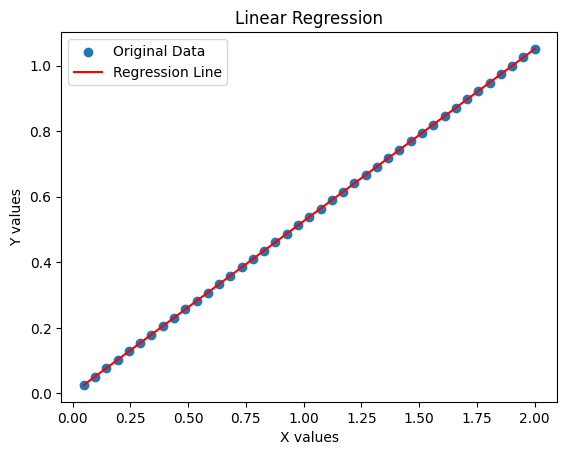

In [3]:

import pandas as pd

df = pd.read_csv('dataset_marks.csv')
def linear_regression(x_values, y_values):
    n = len(x_values)
    mean_x = sum(x_values) / n
    mean_y = sum(y_values) / n

    numerator = sum((x - mean_x) * (y - mean_y) for x, y in zip(x_values, y_values))
    denominator = sum((x - mean_x) ** 2 for x in x_values)
    
    m = numerator / denominator
    b = mean_y - m * mean_x
    
    y_pred = [m * x + b for x in x_values]
    mse = sum((y - y_pred) ** 2 for y, y_pred in zip(y_values, y_pred)) / n
    
    ss_total = sum((y - mean_y) ** 2 for y in y_values)
    ss_residual = sum((y - y_pred) ** 2 for y, y_pred in zip(y_values, y_pred))
    r_squared = 1 - (ss_residual / ss_total)
    return m, b, mse, r_squared, y_pred


Y_values=df["Hours_Studied"]
X_values=df["Marks_Obtained"]

slope, intercept, mse, r_squared, y_pred = linear_regression(X_values, Y_values)

print(f"Slope (m): {slope}")
print(f"Intercept (b): {intercept}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R²): {r_squared}")

import matplotlib.pyplot as plt
plt.scatter(X_values, Y_values, label='Original Data')
plt.plot(X_values, y_pred, color='red', label='Regression Line')
plt.xlabel('X values')
plt.ylabel('Y values')
plt.title('Linear Regression')
plt.legend()
plt.show()

In [4]:
x_to_predict = 0.04
predicted_y = slope * x_to_predict + intercept

print(f"Predicted value for x = {x_to_predict}: {predicted_y}")


Predicted value for x = 0.04: 0.021025641025641133


In [8]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_csv('dataset_marks.csv')

Y_values = df["Hours_Studied"]
X_values = df["Marks_Obtained"]


def linear_regression(x_values, y_values):
    x_values = np.array(x_values).reshape(-1, 1)
    y_values = np.array(y_values)

    model = LinearRegression()
    model.fit(x_values, y_values)

    y_pred = model.predict(x_values)

    mse = mean_squared_error(y_values, y_pred)
    r_squared = r2_score(y_values, y_pred)

    return model.coef_[0], model.intercept_, mse, r_squared, y_pred, model


slope, intercept, mse, r_squared, y_pred, model = linear_regression(X_values, Y_values)



x_to_predict = np.array([[4]]) 
predicted_y = model.predict(x_to_predict)

print(f"Predicted value for x = 4: {predicted_y}")


Slope (m): 0.5256410256410257
Intercept (b): -1.1102230246251565e-16
Mean Squared Error (MSE): 9.140240390031679e-33
R-squared (R²): 1.0
Predicted value for x = 4: [2.1025641]
